In [101]:
import re
from nltk.util import ngrams
import glob
import environment2
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [102]:
env = environment2.environment2()
user_list_2D = env.user_list_2D


In [103]:
 user_list_experienced=np.array(['data/NDSI-2D\\taskname_ndsi-2d-task_userid_82316e37-1117-4663-84b4-ddb6455c83b2.csv',
'data/NDSI-2D\\taskname_ndsi-2d-task_userid_ff56863b-0710-4a58-ad22-4bf2889c9bc0.csv',
'data/NDSI-2D\\taskname_ndsi-2d-task_userid_bda49380-37ad-41c5-a109-7fa198a7691a.csv',
'data/NDSI-2D\\taskname_ndsi-2d-task_userid_3abeecbe-327a-441e-be2a-0dd3763c1d45.csv',
'data/NDSI-2D\\taskname_ndsi-2d-task_userid_6d49fab8-273b-4a91-948b-ecd14556b049.csv',
'data/NDSI-2D\\taskname_ndsi-2d-task_userid_954edb7c-4eae-47ab-9338-5c5c7eccac2d.csv',
'data/NDSI-2D\\taskname_ndsi-2d-task_userid_a6aab5f5-fdb6-41df-9fc6-221d70f8c6e8.csv',
'data/NDSI-2D\\taskname_ndsi-2d-task_userid_8b544d24-3274-4bb0-9719-fd2bccc87b02.csv'])

In [104]:
user_list_first_time=np.setdiff1d(user_list_2D, user_list_experienced)

In [105]:
#result_dataframe= pd.DataFrame(columns=['User','ROI_Cycle','SouthEast','South','OhioValley','NorthernRockiesPlains','SouthWest','NorthWest','UpperMidwest','Northeast','West','Other','None'])
all_dfs=[]
for u in user_list_experienced[:4]:
  print("###########################",u)
  df = pd.read_csv(u)
  df=df[df.State !='Answering']
  u=u.lstrip('data/NDSI-2D\\taskname_ndsi-2d-task_')
  #u=u.lstrip('data/NDSI-3D\\taskname_ndsi-3d-task_')
  u=u.rstrip('.csv')
  one_string = ','.join(df['State'].tolist())
  tokens = [re.sub(r'[^a-zA-Z0-9\s]', ' ', token) for token in one_string.split(",") if token != ""]
  output = list(ngrams(tokens, 4))
  df = pd.Series(output).value_counts()
  df_last=pd.DataFrame([df])
  df_last["User"]=u
  df_last['Experience']=1
  all_dfs.append(df_last)


########################### data/NDSI-2D\taskname_ndsi-2d-task_userid_82316e37-1117-4663-84b4-ddb6455c83b2.csv
########################### data/NDSI-2D\taskname_ndsi-2d-task_userid_ff56863b-0710-4a58-ad22-4bf2889c9bc0.csv
########################### data/NDSI-2D\taskname_ndsi-2d-task_userid_bda49380-37ad-41c5-a109-7fa198a7691a.csv
########################### data/NDSI-2D\taskname_ndsi-2d-task_userid_3abeecbe-327a-441e-be2a-0dd3763c1d45.csv


In [106]:
all_user_list_first_time_dfs=[]
for u in user_list_first_time[:4]:
  print("###########################",u)
  df = pd.read_csv(u)
  df=df[df.State !='Answering']
  u=u.lstrip('data/NDSI-2D\\taskname_ndsi-2d-task_')
  #u=u.lstrip('data/NDSI-3D\\taskname_ndsi-3d-task_')
  u=u.rstrip('.csv')
  one_string = ','.join(df['State'].tolist())
  tokens = [re.sub(r'[^a-zA-Z0-9\s]', ' ', token) for token in one_string.split(",") if token != ""]
  output = list(ngrams(tokens, 4))
  df = pd.Series(output).value_counts()
  df_last=pd.DataFrame([df])
  df_last["User"]=u
  df_last['Experience']=0
  all_user_list_first_time_dfs.append(df_last)

########################### data/NDSI-2D\taskname_ndsi-2d-task_userid_44968286-f204-4ad6-a9b5-d95b38e97866.csv
########################### data/NDSI-2D\taskname_ndsi-2d-task_userid_72a8d170-77ae-400e-b2a5-de9e1d33a714.csv
########################### data/NDSI-2D\taskname_ndsi-2d-task_userid_733a1ac5-0b01-485e-9b29-ac33932aa240.csv
########################### data/NDSI-2D\taskname_ndsi-2d-task_userid_7d014c75-453b-4188-9e4e-fb086984896a.csv


In [107]:
final_df=pd.concat([pd.concat(all_dfs),pd.concat(all_user_list_first_time_dfs)])
final_df=final_df.fillna(0)

In [108]:
final_df.drop(final_df.index)

,"(Navigation, Navigation, Navigation, Navigation)","(Foraging, Foraging, Foraging, Foraging)","(Sensemaking, Sensemaking, Sensemaking, Sensemaking)","(Navigation, Navigation, Navigation, Sensemaking)","(Sensemaking, Navigation, Navigation, Navigation)","(Foraging, Navigation, Navigation, Navigation)","(Navigation, Navigation, Navigation, Foraging)","(Navigation, Navigation, Sensemaking, Sensemaking)","(Navigation, Sensemaking, Sensemaking, Sensemaking)","(Sensemaking, Sensemaking, Sensemaking, Navigation)",...,"(Foraging, Foraging, Navigation, Navigation)","(Navigation, Navigation, Foraging, Navigation)","(Navigation, Foraging, Navigation, Navigation)",User,Experience,"(Navigation, Foraging, Foraging, Navigation)","(Navigation, Sensemaking, Sensemaking, Navigation)","(Foraging, Navigation, Navigation, Sensemaking)","(Sensemaking, Navigation, Navigation, Foraging)","(Foraging, Navigation, Navigation, Foraging)"


In [109]:
final_df.head(5)


,"(Navigation, Navigation, Navigation, Navigation)","(Foraging, Foraging, Foraging, Foraging)","(Sensemaking, Sensemaking, Sensemaking, Sensemaking)","(Navigation, Navigation, Navigation, Sensemaking)","(Sensemaking, Navigation, Navigation, Navigation)","(Foraging, Navigation, Navigation, Navigation)","(Navigation, Navigation, Navigation, Foraging)","(Navigation, Navigation, Sensemaking, Sensemaking)","(Navigation, Sensemaking, Sensemaking, Sensemaking)","(Sensemaking, Sensemaking, Sensemaking, Navigation)",...,"(Foraging, Foraging, Navigation, Navigation)","(Navigation, Navigation, Foraging, Navigation)","(Navigation, Foraging, Navigation, Navigation)",User,Experience,"(Navigation, Foraging, Foraging, Navigation)","(Navigation, Sensemaking, Sensemaking, Navigation)","(Foraging, Navigation, Navigation, Sensemaking)","(Sensemaking, Navigation, Navigation, Foraging)","(Foraging, Navigation, Navigation, Foraging)"
0,8,5,5.0,4,3.0,3,2.0,2,2,2.0,...,1,1.0,1.0,userid_82316e37-1117-4663-84b4-ddb6455c83b2,1,0.0,0.0,0.0,0.0,0.0
0,27,18,39.0,9,8.0,7,6.0,8,5,4.0,...,8,0.0,0.0,userid_ff56863b-0710-4a58-ad22-4bf2889c9bc0,1,3.0,3.0,1.0,1.0,0.0
0,20,12,31.0,4,6.0,3,5.0,7,6,5.0,...,5,1.0,1.0,userid_bda49380-37ad-41c5-a109-7fa198a7691a,1,2.0,1.0,3.0,0.0,0.0
0,9,2,9.0,1,0.0,1,0.0,1,1,0.0,...,2,0.0,0.0,userid_3abeecbe-327a-441e-be2a-0dd3763c1d45,1,0.0,0.0,0.0,0.0,2.0
0,15,10,3.0,4,5.0,4,5.0,3,3,3.0,...,4,2.0,2.0,userid_44968286-f204-4ad6-a9b5-d95b38e97866,0,1.0,0.0,2.0,1.0,0.0


In [110]:
column_names = list(final_df.columns.values)
column_names = [e for e in column_names if e not in ('Experience', 'User')]

In [111]:
final_df_copy=final_df.drop(['User'], axis=1)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(final_df_copy[column_names], final_df_copy['Experience'], test_size = 0.33, random_state = 42)

In [113]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)

C:\Users\Nischal Aryal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [114]:
y_pred_en = dtree.predict(X_test)

C:\Users\Nischal Aryal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [115]:
print('Model accuracy score with criterion Gini: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion Gini: 0.3333


In [116]:
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix: tn, fp,fn,tp\n\n', cm.ravel())

Confusion matrix: tn, fp,fn,tp

 [0 1 1 1]


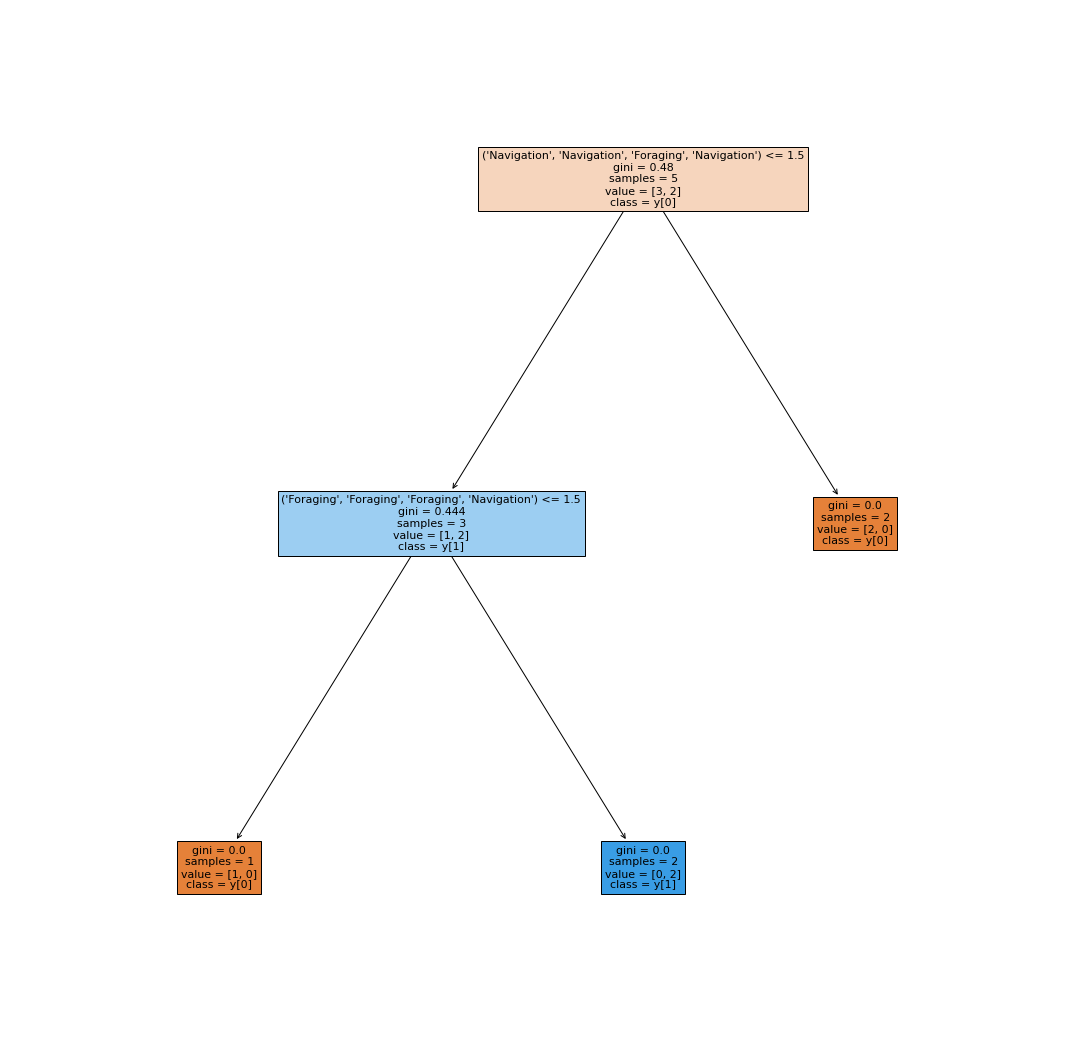

In [117]:
import time
plt.figure(figsize=(19,19))  # set plot size (denoted in inches)
tree.plot_tree(dtree, feature_names=column_names, class_names=True,filled=True, fontsize=11)
filename= "tree" + str(time.time()) + str(".jpg")
plt.savefig(filename,format='jpg',bbox_inches = "tight")
plt.show()